# ADM EVOLUTION EQUATIONS IN SPHERICAL SYMMETRY
## Elements de Relativitat Numèrica
### Arnau Duran Mayol

In numerical relativity, a spherically symmetric space-time is often used to simplify the numerical codes. Even though it already represents a full three-dimensional spacetime, the dynamical variables depend only on the radial coordinate, so the numerical codes are one-dimensional. Furthermore, many interesting astrophysical systems, in particular stars
and black holes can be considered spherically symmetric, so it allows us to study interesting physical problems on these objects.

Considering spherical symmetry, the line element can be expressed as:
$$dl^2=A(r,t)dr^2+r^2B(r,t)d\Omega^2$$

Where $d\Omega^2=d\theta^2+sin^2\theta d\phi^2$

The variables used are {$A, B, K_A, K_B, D_A, D_B, \alpha, D_{\alpha}, \lambda$}. $A$ and $B$ are the positive metric functions from the line element. As we deal with the Einstein equations in the first order form, the auxiliary quantities $D_A$ and $D_B$ are introduced. $K_A$ and $K_B$ are the mixed components of the extrinsic curvature. The lapse function $\alpha$ represents the rate at which proper time advances along a set of observers known as the coordinate time slices and also has an auxiliary quantity $D_{\alpha}$. Finally, $\lambda$ is an auxiliary variable used to deal with the regularity problem.

We obtain the auxiliary quantities from: $D_A=\partial_rlnA$,   $D_B=\partial_rlnB$,   $D_{\alpha}=\partial_rln\alpha$

Equations: 

$$\partial_tA=-2\alpha AK_A$$

$$\partial_tB=-2\alpha BK_B$$

$$\partial_tD_A=-2\alpha[K_AD_{\alpha}+\partial_rK_A]$$

$$\partial_tD_B=-2\alpha[K_BD_{\alpha}+\partial_rK_B]$$

$$\partial_tK_A=-\frac{\alpha}{A}[\partial_r(D_{\alpha}+D_B)+D^2_{\alpha}-\frac{D_{\alpha}D_A}{2}+\frac{D^2_B}{2}-\frac{D_AD_B}{2}-AK_A(K_A+2K_B)-\frac{1}{r}(D_A-2D_B)]$$

$$\partial_tK_B=-\frac{\alpha}{2A}[\partial_rD_B+D_{\alpha}D_B+D^2_B-\frac{D_AD_B}{2}-\frac{1}{r}(D_A-2D_{\alpha}-4D_B)+\frac{2 \lambda}{r}]+\alpha K_B(K_A+2K_B)$$

$$\partial_t \lambda=\frac{2\alpha A}{B}[\partial_rK_B-\frac{D_B}{2}(K_A-K_B)+4\pi j_A]$$

$$\partial_t \alpha=-\alpha^2f(\alpha)(K_A+2K_B)$$

Where $f(\alpha)=2/\alpha$.

$$\partial_t D_{\alpha}=-\partial_r[\alpha f(\alpha)(K_A+2K_B)]$$


The Hamiltonian constraint (H) arises from the time-time component of Einstein's equations. In the 3+1 decomposition, it takes the form of a differential equation involving the spatial metric and its derivatives, along with the extrinsic curvature of the spatial hypersurface.
The momentum constraint (M) arises from the time-space components of Einstein's equations. It involves the spatial derivatives of the spatial metric and the extrinsic curvature tensor.
$H=-\partial_rD_B-\frac{\lambda}{r}+AK_B(2K_A+K_B)+\frac{1}{r}(D_A-3D_B)+\frac{D_AD_B}{2}-\frac{3D^2_B}{4}-8\pi A\rho=0$

$M= -\partial_rK_B+(K_A-K_B)[\frac{1}{r}+\frac{D_B}{2}]-4\pi j_A=0$

Where $j_A=j_r$ is just the momentum density of matter in the radial direction. $j_A$ is zero in a vacuum.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML
from scipy.interpolate import interp1d

In [2]:
# Define constants
mass = 2
rmax = 30
N = 1000
dr=rmax/(N-3/2)
CFL = 0.5
dt = CFL * dr
t = 15
r = (np.arange(N) - 1/2)*dr
time_steps = int(np.ceil(t / dt))

# Define initial conditions of the parameters
def initial_conditions(r):
    psi_0 = 1 + mass/(2*r)
    A_0 = psi_0**4
    B_0 = psi_0**4
    D_A_0 = -(4*mass)/(r*(2*r+mass))
    D_B_0 = -(4*mass)/(r*(2*r+mass))
    K_A_0 = np.zeros_like(r)
    K_B_0 = np.zeros_like(r)
    alph_0 = np.ones_like(r)
    D_alph_0 = np.zeros_like(r)
    lambd_0 = np.zeros_like(r)
    return  [A_0, B_0, D_A_0, D_B_0, K_A_0, K_B_0, alph_0, D_alph_0, lambd_0]

# Set initial conditions
U=[np.array(initial_conditions(r))]

In [3]:
def boundary_conditions(u, dr, N):
    # Define a sign vector which changes for odd and even parameters
    s = np.array([1, 1, -1, -1, 1, 1, 1, -1, -1])
    
    u[:, 0] = s * u[:, 1]  # Apply boundary condition at the inner boundary
    u[:, -1] = U[0][:, -1]  # Apply boundary condition at the outer boundary
    
    return u
    
def derivative(u, dr, N):
    # Initialize array to store derivative
    u_new = np.zeros_like(u)
    # Calculate derivative using central difference method
    u_new[..., 1:-1] = (u[..., 2:] - u[..., 0:-2]) * (1 / (2 * dr))
    return u_new 

# Define function for the ADM evolution equations
def equations(u, r, dr, N):
    # Extract parameters
    A, B, D_A, D_B, K_A, K_B, alph, D_alph, lambd = u
    
    # Calculate derivatives RHS
    dA = -2 * alph * A * K_A
    dB = -2 * alph * B * K_B
    dD_A = -2 * alph * (K_A * D_alph + derivative(K_A, dr, N))
    dD_B = -2 * alph * (K_B * D_alph + derivative(K_B, dr, N)) 
    dK_A = -(alph / A) * (derivative(D_alph + D_B, dr, N) + D_alph ** 2 - D_alph * D_A / 2 + D_B ** 2 / 2 - D_A * D_B / 2 - A * K_A * (K_A + 2 * K_B) - 1 / r * (D_A - 2 * D_B)) 
    dK_B = -(alph / (2 * A)) * (derivative(D_B, dr, N) + D_alph * D_B + D_B ** 2 - (D_A * D_B) / 2 - (1 / r) * (D_A - 2 * D_alph - 4 * D_B) + 2 * lambd / r) + alph * K_B * (K_A + 2 * K_B)  
    dalph = -2 * alph * (K_A + 2 * K_B)
    dD_alph = -2 * (derivative(K_A + 2 * K_B, dr, N))
    dlambd = 2 * alph * A / B * (derivative(K_B, dr, N) - D_B / 2 * (K_A - K_B))

    # Stack derivatives into a single array
    u_new = np.stack((dA, dB, dD_A, dD_B, dK_A, dK_B, dalph, dD_alph, dlambd))
    return u_new
    
def constraints(u, time_steps, dr, N, r):
    H = []
    M = []
    for i in range(time_steps):
        # Extract variables from u
        A, B, D_A, D_B, K_A, K_B, alph, D_alph, lambd = u[i, ...]
        
        # Calculate Hamiltonian and momentum constraints
        H.append(-derivative(D_B, dr, N) - lambd / r + A * K_B * (2 * K_A + K_B) + 1 / r * (D_A - 3 * D_B) + D_A * D_B / 2 - 3 / 4 * D_B ** 2)
        M.append(-derivative(K_B, dr, N) + (K_A - K_B) * (1 / r + D_B / 2))
    
    # Take absolute values of constraints
    M = np.abs(M)
    H = np.abs(H)
    
    return H, M

In [4]:
# RK4 integration 
def RK4(U, t, time_steps, equations, constraints, boundary_conditions, dr, dt, N, r):
    # Extract initial condition
    u = U[0]

    # Perform time integration using RK4
    for j in range(time_steps - 1):
        # RK4 steps
        u_0 = u
        du_0 = dt * equations(u_0, r, dr, N)
        u_1 = u_0 + (1/2) * du_0
        du_1 = dt * equations(boundary_conditions(u_1, dr, N), r, dr, N)
        u_2 = u_0 + (1/2) * du_1
        du_2 = dt * equations(boundary_conditions(u_2, dr, N), r, dr, N)
        u_3 = u_0 + du_2
        du_3 = dt * equations(boundary_conditions(u_3, dr, N), r, dr, N)
        
        # Update u using RK4 formula
        u = boundary_conditions(u_0 + (1/6) * (du_0 + 2 * du_1 + 2 * du_2 + du_3), dr, N)
        
        # Append updated u to U
        U.append(u)

    # Convert U to numpy array
    u = np.asarray(U)
    
    # Calculate constraints
    H, M = constraints(u, time_steps, dr, N, r)
    return u, r, H, M

In [5]:
# Perform RK4 integration to solve the differential equations
u, r, H, M = RK4(U, t, time_steps, equations, constraints, boundary_conditions, dr, dt, N, r)

# Initialize lists to store values at final time
A_f = []
alph_f = []
H_f = []
M_f = []

# Extract values at final time from the solution
for i in range(time_steps):
    alph_f.append(u[i, 6, :])  # Extract alpha at final time
    A_f.append(u[i, 0, :])      # Extract A at final time
    H_f.append(H[i])              # Extract Hamiltonian constraint at final time
    M_f.append(M[i])              # Extract momentum constraint at final time

# Convert lists to numpy arrays
A_f = np.asarray(A_f)
alph_f = np.asarray(alph_f)

In [6]:
# Animation plots for alpha, A/PSI^4, Hamiltonian and momentum constraints
psi_0 = 1 + mass/(2*r)
A_psi = A_f/psi_0**4
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

line1,= ax1.plot(r,alph_f[1])
line2,= ax2.plot(r,A_psi[1])
line3,= ax3.plot(r,M_f[1])
line4,= ax4.plot(r,H_f[1])

ax1.set(ylim=[0,3])
ax1.set_ylabel(r'$\alpha$')
ax1.set_xlabel(r'r')

ax2.set(ylim=[0,10])
ax2.set_ylabel(r'$A/\psi^4$')
ax2.set_xlabel(r'r')

ax3.set_yscale('log')
ax3.set(xlim=[0,rmax])
ax3.set_ylabel(r'M')
ax3.set_xlabel(r'r')

ax4.set(xlim=[0,rmax])
ax4.set_yscale('log')
ax4.set_ylabel(r'H')
ax4.set_xlabel(r'r')


def animate(i):
    line1.set_ydata(alph_f[i])
    line2.set_ydata(A_psi[i])
    line3.set_ydata(np.abs(M_f[i]))
    line4.set_ydata(H_f[i])
    return line1, line2, line3, line4

# Show animation
ani=animation.FuncAnimation(fig,animate,frames=len(M_f),interval=15)
plt.close()
HTML(ani.to_html5_video())

## Convergence of $\alpha$, A and H, M constraints


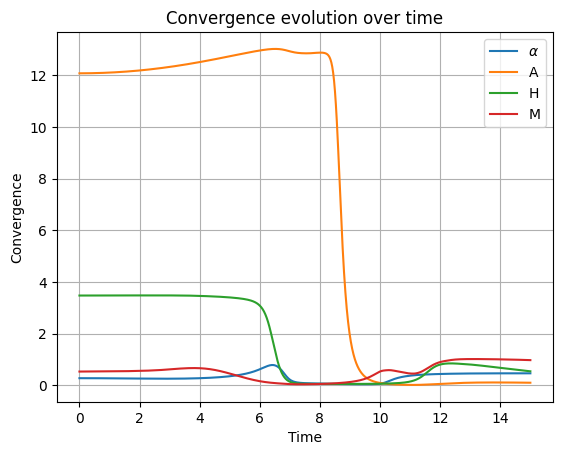

In [7]:
# CONVERGENCE TEST
# For N,N_2 and N_4 resolutions
N_2 = N/2
N_4 = N/4
dr_1 = rmax/(N-3/2)
dr_2 = rmax/(N_2-3/2)
dr_4 = rmax/(N_4-3/2)

r_1 = (np.arange(N) - 1/2)*dr_1
r_2 = (np.arange(N_2) - 1/2)*dr_2
r_4 = (np.arange(N_4) - 1/2)*dr_4
U_1=[np.array(initial_conditions(r_1))]
U_2=[np.array(initial_conditions(r_2))]
U_4=[np.array(initial_conditions(r_4))]

u_1,r_1,H_1,M_1 = RK4(U_1, t, time_steps, equations,constraints, boundary_conditions, dr_1, dt, N, r_1)
u_2,r_2,H_2,M_2 = RK4(U_2, t, time_steps, equations, constraints, boundary_conditions, dr_2, dt, N_2, r_2)
u_4,r_4,H_4,M_4 = RK4(U_4, t, time_steps, equations, constraints, boundary_conditions, dr_4, dt, N_4, r_4)

# Interpolate the solutions onto a common grid
min_radial = min(r_1[1], r_2[1], r_4[1])
max_radial = max(r_1[-1], r_2[-1], r_4[-1])
common_r = np.linspace(min_radial, max_radial, num=N)

# Interpolate u_1 onto the common grid
f_u_1 = interp1d(r_1, u_1)
f_H_1 = interp1d(r_1, H_1)
f_M_1 = interp1d(r_1, M_1)
u_1_resampled = f_u_1(common_r)
H_1_resampled = f_H_1(common_r)
M_1_resampled = f_M_1(common_r)

# Interpolate u_2 onto the common grid
f_u_2 = interp1d(r_2, u_2)
f_H_2 = interp1d(r_2, H_2)
f_M_2 = interp1d(r_2, M_2)
u_2_resampled = f_u_2(common_r)
H_2_resampled = f_H_2(common_r)
M_2_resampled = f_M_2(common_r)

# Interpolate u_4 onto the common grid
f_u_4 = interp1d(r_4, u_4)
f_H_4 = interp1d(r_4, H_4)
f_M_4 = interp1d(r_4, M_4)
u_4_resampled = f_u_4(common_r)
H_4_resampled = f_H_4(common_r)
M_4_resampled = f_M_4(common_r)

# Calculate convergence using resampled solutions
convergence_alph = np.sqrt(np.mean(np.square(u_1_resampled[1:, 6] - 
                            u_2_resampled[1:, 6]), axis=-1)) / np.sqrt(np.mean(np.square(u_2_resampled[1:, 6] - u_4_resampled[1:, 6]), axis=-1))
convergence_A = np.sqrt(np.mean(np.square(u_1_resampled[1:, 0] - 
                            u_2_resampled[1:, 0]), axis=-1)) / np.sqrt(np.mean(np.square(u_2_resampled[1:, 0] - u_4_resampled[1:, 0]), axis=-1))
convergence_H = np.sqrt(np.mean(np.square(H_1_resampled[1:] - H_2_resampled[1:]), axis=-1)) / np.sqrt(np.mean(np.square(H_2_resampled[1:] - H_4_resampled[1:]), axis=-1))
convergence_M = np.sqrt(np.mean(np.square(M_1_resampled[1:] - M_2_resampled[1:]), axis=-1)) / np.sqrt(np.mean(np.square(M_2_resampled[1:] - M_4_resampled[1:]), axis=-1))

# Plot convergence
time = np.linspace(0, time_steps*dt, num=len(convergence_alph))
plt.plot(time, convergence_alph, label=r'$\alpha$')
plt.plot(time, convergence_A, label='A')
plt.plot(time, convergence_H, label='H')
plt.plot(time, convergence_M, label='M')
plt.xlabel('Time')
plt.ylabel('Convergence')
plt.title('Convergence evolution over time')
plt.grid(True)
plt.legend()
plt.show()

The lack of convergence of the numerical solution could caused by singularities or highly oscillatory behaviour in the solution, which can pose challenges for numerical solvers and lead to convergence issues.

